In [ ]:
from google.colab import drive
drive.mount('/gdrive')
# receive data from gdrive

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /gdrive


In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
# import lib

In [ ]:
path = "/gdrive/My Drive/ML:March2020/data/"
raw_data = pd.read_csv(path+"Chennai_house_univariate_train.csv")
raw_data.head()
#getting panda through path

,Size,Price
0,502.69,6.3
1,503.65,6.3
2,505.46,6.5
3,505.94,6.5
4,507.02,6.6


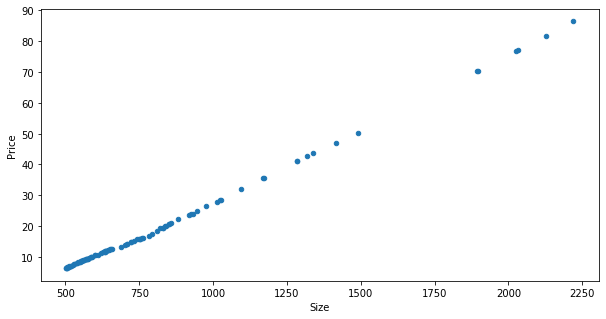

In [ ]:
raw_data.plot(kind="scatter",x="Size",y="Price",figsize=(10,5))


In [ ]:
data=(raw_data-raw_data.mean())/(raw_data.max()-raw_data.min())
data.head()


,Size,Price
0,-0.182399,-0.169891
1,-0.181840,-0.169891
2,-0.180786,-0.167394
3,-0.180507,-0.167394
4,-0.179878,-0.166145


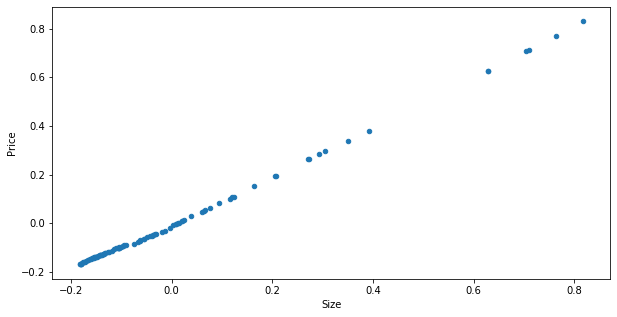

In [ ]:
data.plot(kind="scatter",x="Size",y="Price",figsize=(10,5))


In [ ]:
data.shape

(97, 2)

In [ ]:
data.insert(0,"bias",1)
data.head()

,bias,Size,Price
0,1,-0.182399,-0.169891
1,1,-0.181840,-0.169891
2,1,-0.180786,-0.167394
3,1,-0.180507,-0.167394
4,1,-0.179878,-0.166145


In [ ]:

cols=data.shape[1]
print(cols)
x=data.iloc[:,0:cols-1]
y=data.iloc[:,cols-1:cols]
x=np.matrix(x)
y=np.matrix(y)
theta=np.matrix(np.array([0,0]))
x.shape,theta.shape,y.shape

3


((97, 2), (1, 2), (97, 1))

In [ ]:
def  computeError(x,y,theta):
     inner=np.power(((x*theta.T)-y),2)
     return np.sum(inner)/(2*len(x)) 

In [ ]:
def  gradientDescent(x,y,theta,Learn_rate,iters):
     temp=np.matrix(np.zeros(theta.shape))
     parameters=theta.shape[1]
     cost=np.zeros(iters)
     for i in range(iters):
       error=(x*theta.T)-y
       for j in range(parameters):
         term=np.multiply(error,x[:,j])
         temp[0,j]=theta[0,j]-((Learn_rate/len(x))*np.sum(term))
       theta=temp
       cost[i]=computeError(x,y,theta)
     return theta,cost

In [ ]:
Learn_rate=2
iters=300
new_theta, cost=gradientDescent(x,y,theta,Learn_rate,iters)
print(new_theta)


[[-2.21186185e-16  9.83386604e-01]]


In [ ]:
print(cost)

[1.97104103e-02 1.59588892e-02 1.29233922e-02 1.04672573e-02
 8.47990593e-03 6.87186510e-03 5.57073868e-03 4.51794829e-03
 3.66609591e-03 2.97683007e-03 2.41911911e-03 1.96785416e-03
 1.60271869e-03 1.30727383e-03 1.06821826e-03 8.74789389e-04
 7.18278806e-04 5.91640197e-04 4.89172128e-04 4.06261353e-04
 3.39175122e-04 2.84893125e-04 2.40971516e-04 2.05432888e-04
 1.76677245e-04 1.53409971e-04 1.34583543e-04 1.19350371e-04
 1.07024637e-04 9.70514221e-05 8.89817179e-05 8.24522163e-05
 7.71689506e-05 7.28940613e-05 6.94350873e-05 6.66363011e-05
 6.43716978e-05 6.25393219e-05 6.10566775e-05 5.98570142e-05
 5.88863213e-05 5.81008972e-05 5.74653809e-05 5.69511607e-05
 5.65350859e-05 5.61984240e-05 5.59260182e-05 5.57056044e-05
 5.55272593e-05 5.53829535e-05 5.52661903e-05 5.51717128e-05
 5.50952675e-05 5.50334127e-05 5.49833637e-05 5.49428671e-05
 5.49100998e-05 5.48835865e-05 5.48621337e-05 5.48447753e-05
 5.48307301e-05 5.48193655e-05 5.48101700e-05 5.48027296e-05
 5.47967093e-05 5.479183

In [ ]:
computeError(x,y,new_theta)

5.4771186833181475e-05

In [ ]:
Model_price=x*new_theta.T

Text(0.5, 1.0, 'Predicted Price vs. Size')

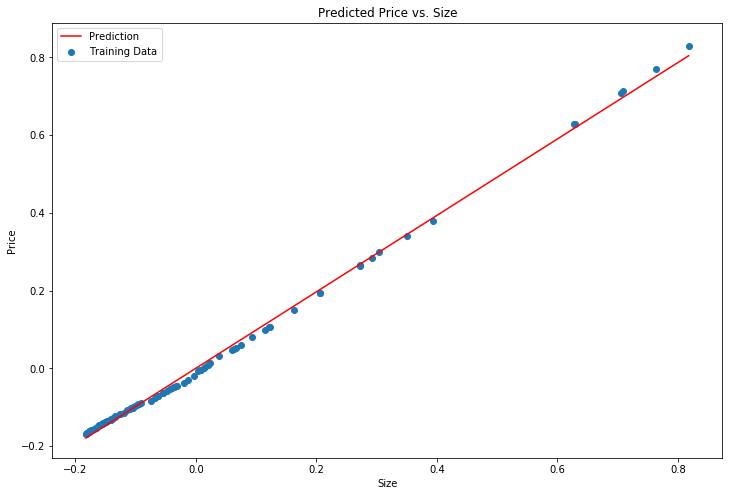

In [ ]:
fig,ax=plt.subplots(figsize=(12,8))
ax.plot(data.Size,Model_price,"r",label="Prediction")
ax.scatter(data.Size,data.Price,label="Training Data")
ax.legend(loc=2)
ax.set_xlabel("Size")
ax.set_ylabel("Price")
ax.set_title("Predicted Price vs. Size")
          

Text(0.5, 1.0, 'Error vs. Iterations')

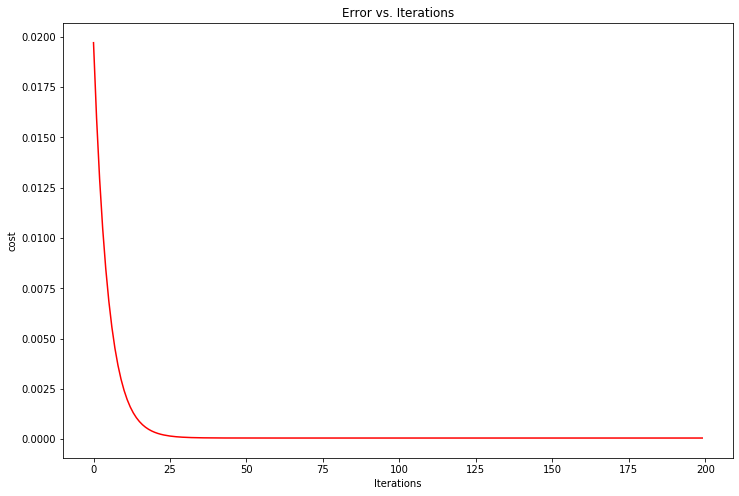

In [ ]:
fig,ax=plt.subplots(figsize=(12,8))
ax.plot(np.arange(iters),cost,"r")
ax.set_xlabel("Iterations")
ax.set_ylabel("cost")
ax.set_title("Error vs. Iterations")

In [ ]:
import math
erro_r=[np.power((b-a),2)for(a,b) in zip(Model_price,y)]
error0=np.sum(erro_r)
error1=math.sqrt(error0)
error=(error1/len(y)*100)
print("error%={}".format(error))
accuracy=100-error
print("accuracy%={}".format(accuracy))

error%=0.10626866054028866
accuracy%=99.8937313394597


In [ ]:
def predict(new_theta,accuracy):
  size = float(input("enter the size of the House in sqt:"))
  size=(size-raw_data.Size.mean())/(raw_data.Size.max()-raw_data.Size.min())
  price= (new_theta[0,0]+(new_theta[0,1]*size))
  Predicted_Price=(price*(raw_data.Price.max()-raw_data.Price.min()))+(raw_data.Price.mean())
  Price_at_Max_Accuracy=(Predicted_Price*(1/accuracy)*100)
  Price_range=Price_at_Max_Accuracy-Predicted_Price
  return Predicted_Price,Price_range


In [ ]:
Predicted_Price,Price_range =  predict(new_theta,accuracy)
print("Your house cost is"+ str(Predicted_Price)+"lakhs"+"(+ or -)"+ str(Price_range)+"lakhs")

enter the size of the House in sqt:600
Your house cost is10.003445827293685lakhs(+ or -)0.010641836825991291lakhs
